# **Abstract**

In the food delivery industry, delivery time directly impacts the overall customer experience, as delays or inaccuracies can lead to dissatisfaction and loss of trust in the service. Timely delivery is quite important and the challenge of providing accurate ETAs (Expected time of Arrival) to the customers is both complex and essential.

A robust prediction model not only helps optimize operations but also streamlines logistics, enabling delivery partners to meet customer expectations with greater reliability. Our goal for this project is to create a prediction model for estimating the time to deliver an order. We will explore and compare two statistical approaches: the frequentist and Bayesian paradigms.

The frequentist approach relies on fixed parameters estimated from observed data, providing point estimates and confidence intervals to make predictions. This approach is often well-suited for a lot of modeling tasks and is computationally efficient. However, it lacks the flexibility to incorporate prior knowledge or update predictions dynamically as new data becomes available.

In contrast, the Bayesian approach incorporates prior beliefs about parameters and updates them with observed data to produce posterior distributions. This allows for greater flexibility, more nuanced predictions and better uncertainty quantification. With reasonable understanding of the domain and the metrics that can effect the delivery time one could come up with reasonable priors which could improve the performance of the model.

By comparing these two paradigms, we aim to identify the strengths and limitations of each in the context of delivery time prediction. This comparison will help us determine which methodology best balances accuracy, interpretability, and scalability for optimizing the food delivery process.

# **Introduction**


Timely and accurate delivery time prediction is vital for success in the highly competitive food delivery industry. As customer expectations for fast and reliable service continue to grow, delivery delays or inaccurate ETAs (Expected Time of Arrival) can lead to customer dissatisfaction, loss of trust, and even reduced brand loyalty. Accurate ETA prediction is not only crucial for enhancing the customer experience but also for optimizing logistics, allocating resources, and improving delivery partner performance. For instance high ETAs can also give an indication of different issues in the delivery funnel. It could indicate that either demand is too high, delivery partners are unavailable or dispersed (supply is low) or matching of delivery partners with restaurants is not efficient enough.

The food delivery process involves several dynamic factors that make ETA prediction a challenging task. Traffic congestion, weather conditions, road conditions, delivery partner efficiency, and order complexity all interact in unpredictable ways. A robust prediction model must account for these uncertainties while being efficient and scalable to handle real-world, large-scale data.

This project aims to develop and compare models for predicting ETAs. Frequentist models are widely used in the industry due to their simplicity, computational efficiency, and ability to provide quick point predictions. However, they lack the flexibility to incorporate prior knowledge or adapt dynamically to new data. On the other hand, Bayesian models enable the integration of domain expertise through priors and offer richer insights by quantifying uncertainties in predictions. However, their computational complexity can be a challenge for large datasets and real time applications.

We use a comprehensive real-world dataset from Kaggle, which includes:

*   Delivery partner characteristics: Age, ratings, and performance history.
*   Environmental factors: Weather conditions and traffic density.
*  Order attributes: Number of deliveries per trip and indicators for special events (e.g., festivals).
* Time-based features: Cyclical variables representing the time of day (sine and cosine transformations).


Our workflow is structured in two phases:

#### **Model Training on the Full Dataset:**

We first train our frequentist and Bayesian regression models on the full dataset to examine how well the models fit the data.
This phase focuses on interpreting the coefficients to assess the relative importance of each predictor, enabling us to gain insights into the key factors influencing delivery times.

#### **Model Prediction and Evaluation:**

We then split the dataset into training and test sets to evaluate the predictive performance of the models.
By comparing the prediction accuracy on unseen data, we aim to assess the strengths and limitations of each approach.
By combining model interpretation with predictive evaluation, this study seeks to balance accuracy, interpretability, scalability, and uncertainty quantification. The findings will provide actionable insights for improving ETA predictions in the food delivery industry, helping companies optimize operations and meet growing customer demands.

# **Installing & Importing Libraries**

In [1]:
## installing packages
!pip install numpyro

## importing libraries
import arviz as az
import pymc as pm
import pandas as pd
import numpy as np
import seaborn as sns
import math
import pytensor
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import pytensor.tensor as pt
import pandas as pd
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
pytensor.config.cxx = ""
pd.set_option('display.max_columns',50)
rng = np.random.default_rng(666)


### Setting seaborn theme
sns.set_theme(style="whitegrid")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.1/356.1 kB 7.5 MB/s eta 0:00:00


# **Data Processing & Exploration**


### **Loading Data**



The dataset used for this project initially consisted of 45,593 rows and 20 columns, capturing various attributes of delivery operations, such as delivery personnel characteristics, timestamps for orders and pickups, geographic coordinates, weather conditions, and traffic density. While the dataset provided a comprehensive view of the factors influencing delivery times, its large size introduced computational challenges, particularly during preprocessing and model development phases.

In [2]:
data = pd.read_csv('train.csv')

print("Original Data Shape: ",data.shape)
data

Original Data Shape:  (45593, 20)


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


### Data Summary

In [3]:
data.shape

(45593, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [5]:
data.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


### **Data Processing**


To ensure data consistency and quality, all rows containing missing or null values were removed. This decision was informed by the dataset’s size, which allowed for the elimination of incomplete rows without significantly compromising the diversity or representativeness of the data. Key features such as Weatherconditions and Road_traffic_density had missing values that could not be imputed meaningfully and were therefore dropped to maintain the integrity of the dataset. By focusing on a clean and complete dataset, we ensured that subsequent analyses and modeling efforts were built on reliable data.


In [6]:
#### Data preprocessing
data['Time_taken(min)'] = data['Time_taken(min)'].str.extract('(\d+)').astype(float)
data['Time_taken(min)'] = data['Time_taken(min)'].fillna(1)
data['Delivery_person_Age'] = data['Delivery_person_Age'].astype(float)
data['Delivery_person_Ratings'] = data['Delivery_person_Ratings'].astype(float)
data['multiple_deliveries'] = data['multiple_deliveries'].astype(float)


#### Parse date and hour
data['Hour'] = pd.to_datetime(data['Time_Orderd'], format='%H:%M:%S', errors='coerce').dt.hour
data['Order_DateTime'] = pd.to_datetime(data['Order_Date'],dayfirst=True) + pd.to_timedelta(data['Hour'], unit='h')
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='%d-%m-%Y',dayfirst=True)


### Standardize categorical columns by stripping spaces and handling 'NaN' strings
categorical_columns = [
    'Weatherconditions', 'Road_traffic_density', 'Type_of_order', 'Festival', 'City'
]

#### Removing spaces and replacing 'NaN' with np.nan
for col in categorical_columns:
    data[col] = data[col].str.strip()
    data[col] = data[col].replace(['NaN'], np.nan)


### Converting 'Order_Date', 'Time_Orderd', and 'Time_Order_picked' to datetime
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='%d-%m-%Y', errors='coerce')
data['Time_Orderd'] = pd.to_datetime(data['Time_Orderd'], format='%H:%M:%S', errors='coerce')
data['Time_Order_picked'] = pd.to_datetime(data['Time_Order_picked'], format='%H:%M:%S', errors='coerce')

### Extracting day of the week and hour of day
data['day_of_week'] = data['Order_Date'].dt.day_name()
data['hour_of_day'] = data['Time_Orderd'].dt.hour

### dropping NAs
data = data.dropna()

print('Data shape after removing Nulls: ',data.shape)

Data shape after removing Nulls:  (41368, 24)


A supposedly important feature, total delivery distance, was created using the Haversine formula, which calculates the great-circle distance between the restaurant and delivery location based on their geographic coordinates. This feature captures the delivery distance, a key determinant of delivery time.

Deliveries with distances exceeding 100 km were excluded, as they represent outliers unlikely to occur in typical food delivery operations since generally orders are limited to shorter distances to optimize cost and operational efficiency. This ensured the dataset remained practical and realistic for modeling.

Due to computational constraints, the dataset was further reduced to a subset of 1,500 rows. While working with a smaller sample limited the scope of immediate analysis, it allowed us to efficiently prototype and evaluate models without being hindered by resource limitations. Importantly, this subset retained the key patterns and relationships present in the full dataset, enabling robust analysis within a manageable computational framework.

The entire modeling process, including feature engineering, analysis, inference (coefficient interpretation and evaluation) and prediction on train test set, was conducted on this sample of 1,500 rows. By addressing both data quality and computational challenges, this phase set a strong foundation for building effective and interpretable prediction models.

These steps enhanced the dataset's quality and ensured it was ready for modeling while incorporating meaningful features like total_distance to improve delivery time predictions.

In [7]:
### Making a function
### to computee delivery distance using haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    ### Converting degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    ### Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    ### Earth's radius in kilometers
    r = 6371
    return c * r

#### Creating total delivery distance feature
data['total_distance'] = haversine_distance(
    data['Restaurant_latitude'], data['Restaurant_longitude'],
    data['Delivery_location_latitude'], data['Delivery_location_longitude']
)


#### Excluding orders where the delivery distance is greater than 100 kms since those would be extreme cases
#### and from practical business perspective don't make sense since normally delivery distances are short

data  = data[data.total_distance<100]

### Because of limited computational resources we are working with a subset of the original data
data = data.sample(n=1500, random_state=42)


### Define float and categorical columns
float_cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries', 'Vehicle_condition','total_distance']
cat_cols = ['Weatherconditions', 'Road_traffic_density', 'Festival', 'Type_of_vehicle','hour_of_day']

<ipython-input-7-20b3716bd2d4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_distance'] = haversine_distance(


We look at the unique values in each of the categorical and ordinal columns.  Vehicle condition is specified as 0, 1, 2 where we assume 0 is bad and 2 is
good since no description in the data is given and the visualizations below confirm this since for 0 avg_time_taken is high which means vehicles in bad conditions would take more time.

In [8]:
### Selecting categorical columns
categorical_columns = data.select_dtypes(include='object')
lst = list(categorical_columns.columns) + ['Vehicle_condition','Delivery_person_Ratings','multiple_deliveries']
#### Getting unique values for each categorical column
unique_values = {col: data[col].unique() for col in  lst if col not in ['ID','Delivery_person_ID'] }

for col, values in unique_values.items():
    print(f"Column: {col}, Unique values: {values}")

Column: Weatherconditions, Unique values: ['conditions Stormy' 'conditions Cloudy' 'conditions Windy'
 'conditions Sunny' 'conditions Sandstorms' 'conditions Fog']
Column: Road_traffic_density, Unique values: ['Low' 'High' 'Jam' 'Medium']
Column: Type_of_order, Unique values: ['Drinks' 'Snack' 'Meal' 'Buffet']
Column: Type_of_vehicle, Unique values: ['motorcycle ' 'scooter ' 'electric_scooter ']
Column: Festival, Unique values: ['No' 'Yes']
Column: City, Unique values: ['Metropolitian' 'Urban' 'Semi-Urban']
Column: day_of_week, Unique values: ['Thursday' 'Monday' 'Friday' 'Saturday' 'Sunday' 'Tuesday' 'Wednesday']
Column: Vehicle_condition, Unique values: [1 2 0]
Column: Delivery_person_Ratings, Unique values: [4.8 4.6 4.9 4.7 5.  4.5 4.1 4.2 4.4 4.3 4.  3.9 3.8 3.5 3.6 3.1 3.7 2.7
 2.8]
Column: multiple_deliveries, Unique values: [1. 0. 2. 3.]


In [9]:
data.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,Time_taken(min),Hour,Order_DateTime,hour_of_day,total_distance
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500,1500,1500,1500.000000,1500.000000,1500.000000,1500.000000,1500,1500.000000,1500.000000
mean,29.693333,4.645600,17.710179,72.146751,17.774065,72.210638,2022-03-13 15:58:04.800000,1900-01-01 17:48:00.999999744,1900-01-01 17:35:39.199999744,1.017333,0.735333,26.658000,17.302667,2022-03-14 09:16:14.400000,17.302667,9.770920
min,20.000000,2.700000,0.000000,0.000000,0.010000,0.010000,2022-02-11 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,0.000000,0.000000,10.000000,0.000000,2022-02-11 00:00:00,0.000000,1.465140
25%,25.000000,4.500000,12.970221,73.773572,13.007839,73.825639,2022-03-04 00:00:00,1900-01-01 15:20:00,1900-01-01 14:42:30,0.000000,0.000000,19.000000,15.000000,2022-03-04 20:00:00,15.000000,4.657645
50%,30.000000,4.700000,18.562450,76.310019,18.640059,76.386999,2022-03-15 00:00:00,1900-01-01 19:00:00,1900-01-01 19:00:00,1.000000,1.000000,26.000000,19.000000,2022-03-15 11:00:00,19.000000,9.193249
75%,35.000000,4.900000,22.745171,78.370508,22.806417,78.413839,2022-03-26 00:00:00,1900-01-01 21:30:00,1900-01-01 21:30:00,2.000000,1.000000,33.000000,21.000000,2022-03-26 22:00:00,21.000000,13.681609
max,39.000000,5.000000,30.902872,88.433187,31.039992,88.530581,2022-04-06 00:00:00,1900-01-01 23:55:00,1900-01-01 23:55:00,2.000000,3.000000,54.000000,23.000000,2022-04-06 23:00:00,23.000000,20.968650
std,5.771553,0.300079,7.126969,19.074966,7.128184,19.074170,NaN,NaN,NaN,0.823094,0.580956,9.339407,4.827276,NaN,4.827276,5.644674


### **Visualization**

Next we explore the data visually and plot some graphs and charts.
The visualizations provide key insights into delivery time patterns, demand fluctuations, and operational factors. We observe the following things:

* Delivery Time Distribution: Most orders are delivered within 25-35 minutes, with few delays beyond 50 minutes, reflecting efficient delivery processes overall.

* Demand Over Time: Order volumes show fluctuations with noticeable peaks, likely tied to external events, highlighting the need for dynamic resource planning.

* Day of the Week: Delivery times are consistent throughout the week but slightly higher and more variable on weekends, indicating increased traffic or demand.

* Hour of the Day: Delivery times rise during lunch (12:00–14:00) and dinner (18:00–21:00) peaks, aligning with typical meal orders.

* Hourly Demand Patterns: Demand peaks during lunch and dinner hours, emphasizing the need for efficient scheduling and resource allocation during these periods.

* Based on correlation matrix we can say longer distances and multiple deliveries increase delivery times. Higher-rated delivery personnel tend to be faster.


<ipython-input-10-adc95b268d28>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot["plot_func"](x=plot.get("x"), y=plot.get("y"), data=plot.get("data"), ax=plot["ax"], **plot["kwargs"])
<ipython-input-10-adc95b268d28>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot["plot_func"](x=plot.get("x"), y=plot.get("y"), data=plot.get("data"), ax=plot["ax"], **plot["kwargs"])


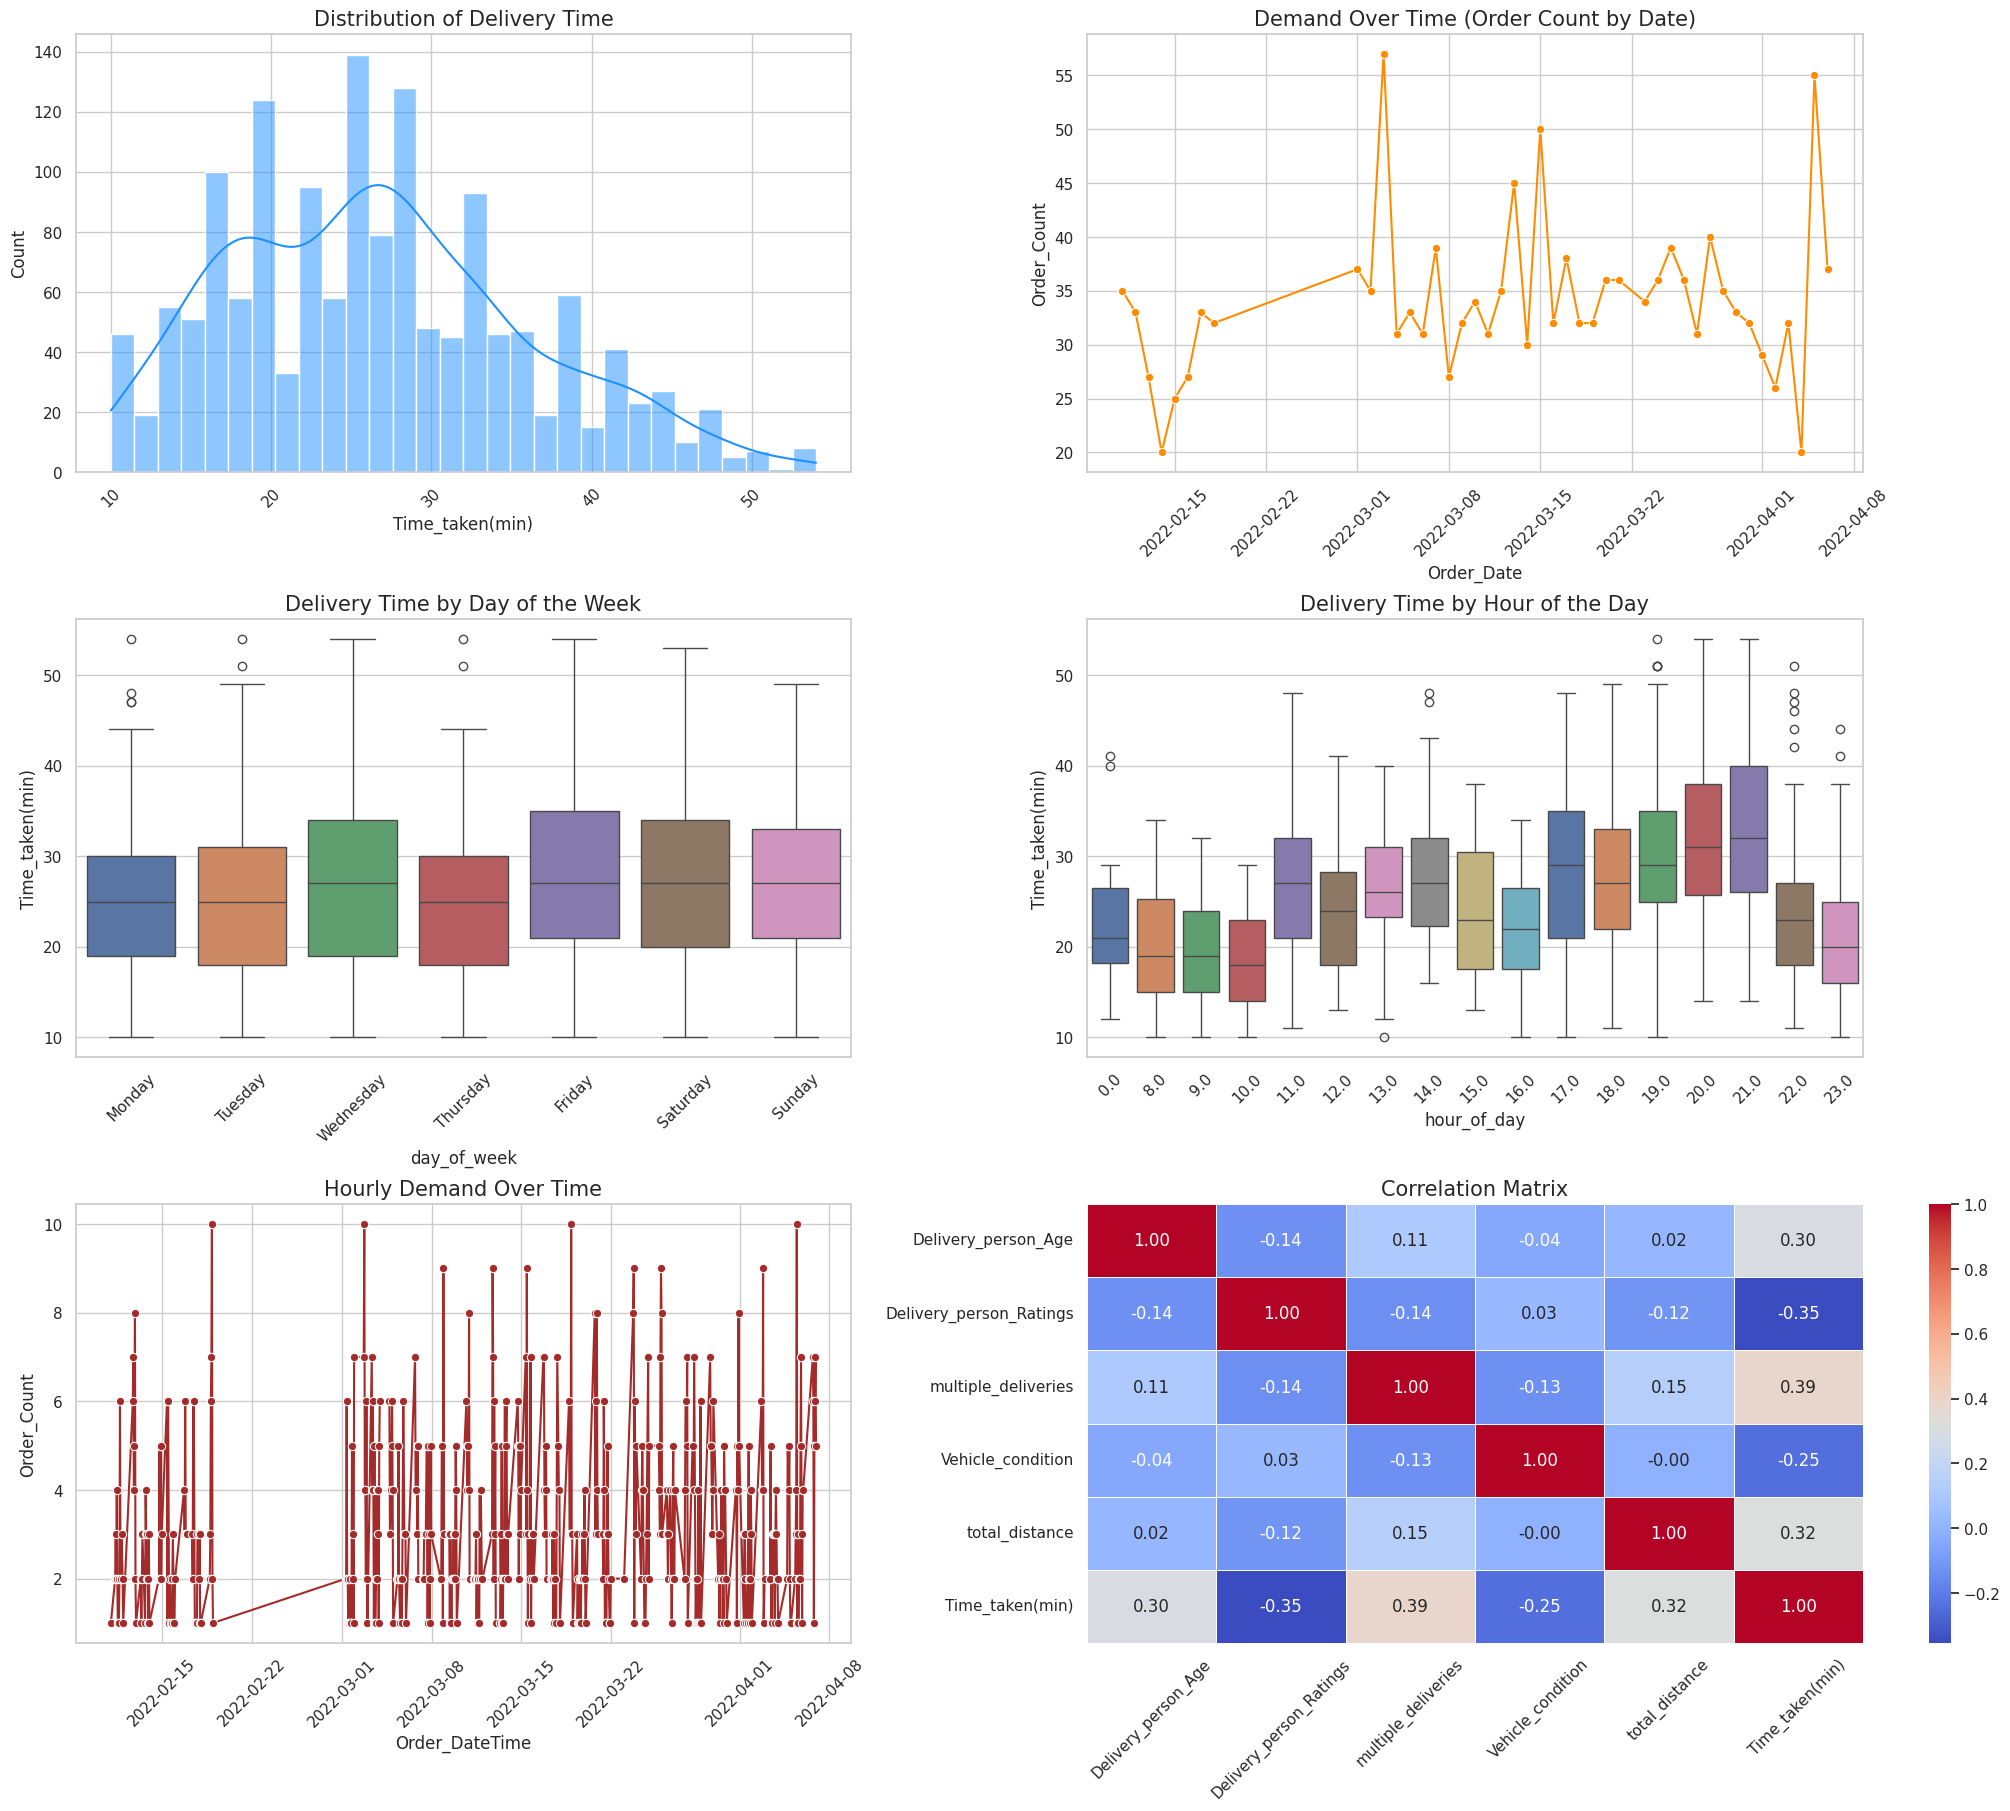

In [10]:
#### Group data by Order_Date to calculate order count
demand_data = data.groupby('Order_Date').size().reset_index(name='Order_Count')
#### Hourly demand over date and hour
hourly_demand_datetime = data.groupby('Order_DateTime').size().reset_index(name='Order_Count')

#### Correlation matrix ####
corr_matrix = data[float_cols+['Time_taken(min)']].corr()


fig, axes = plt.subplots(3, 2, figsize=(20, 18), constrained_layout=True)

### Plot configs
plots = [
    {
        "type": "hist", "plot_func": sns.histplot, "x": data['Time_taken(min)'], "title": "Distribution of Delivery Time",
        "ax": axes[0, 0], "kwargs": {"bins": 30, "kde": True, "color": "dodgerblue"}
    },
    {
        "type": "line", "plot_func": sns.lineplot, "x": "Order_Date", "y": "Order_Count", "data": demand_data,
        "title": "Demand Over Time (Order Count by Date)", "ax": axes[0, 1], "kwargs": {"marker": "o", "color": "darkorange"}
    },
    {
        "type": "box", "plot_func": sns.boxplot, "x": "day_of_week", "y": "Time_taken(min)", "data": data,
        "title": "Delivery Time by Day of the Week", "ax": axes[1, 0],
        "kwargs": {"order": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], "palette": "deep"}
    },
    {
        "type": "box", "plot_func": sns.boxplot, "x": "hour_of_day", "y": "Time_taken(min)", "data": data,
        "title": "Delivery Time by Hour of the Day", "ax": axes[1, 1], "kwargs": {"palette": "deep"}
    },
    {
        "type": "line", "plot_func": sns.lineplot, "x": "Order_DateTime", "y": "Order_Count", "data": hourly_demand_datetime,
        "title": "Hourly Demand Over Time", "ax": axes[2, 0], "kwargs": {"marker": "o", "color": "brown"}
    },
    {
        "type": "heatmap", "plot_func": sns.heatmap, "data": corr_matrix, "title": "Correlation Matrix",
        "ax": axes[2, 1], "kwargs": {"annot": True, "cmap": "coolwarm", "fmt": ".2f", "linewidths": 0.5}
    }
]

#### Generating plots automatically
for plot in plots:
    if plot["type"] in ["hist", "line", "box"]:
        plot["plot_func"](x=plot.get("x"), y=plot.get("y"), data=plot.get("data"), ax=plot["ax"], **plot["kwargs"])
    elif plot["type"] == "heatmap":
        plot["plot_func"](plot["data"], ax=plot["ax"], **plot["kwargs"])
    plot["ax"].set_title(plot["title"], fontsize=15)
    plot["ax"].tick_params(axis='x', rotation=45)


plt.show()


We can get the following insights from these plots:


* Weatherconditions: Foggy weather is most common, likely impacting delivery times and availability.

* Road Traffic Density: High traffic density and traffic Jam dominates, emphasizing the need for efficient routing.

* Type of Order: In terms of frequency all order types have more or less similar frequencies.

* Type of Vehicle: Motorcycles are the primary vehicle.

* Festival: Most orders occur outside festivals, but high demand during festivals may require resource scaling.

* City: Demand seems to be the highest in metropolitan areas, which seems obvious since the major population density is normally in these areas.

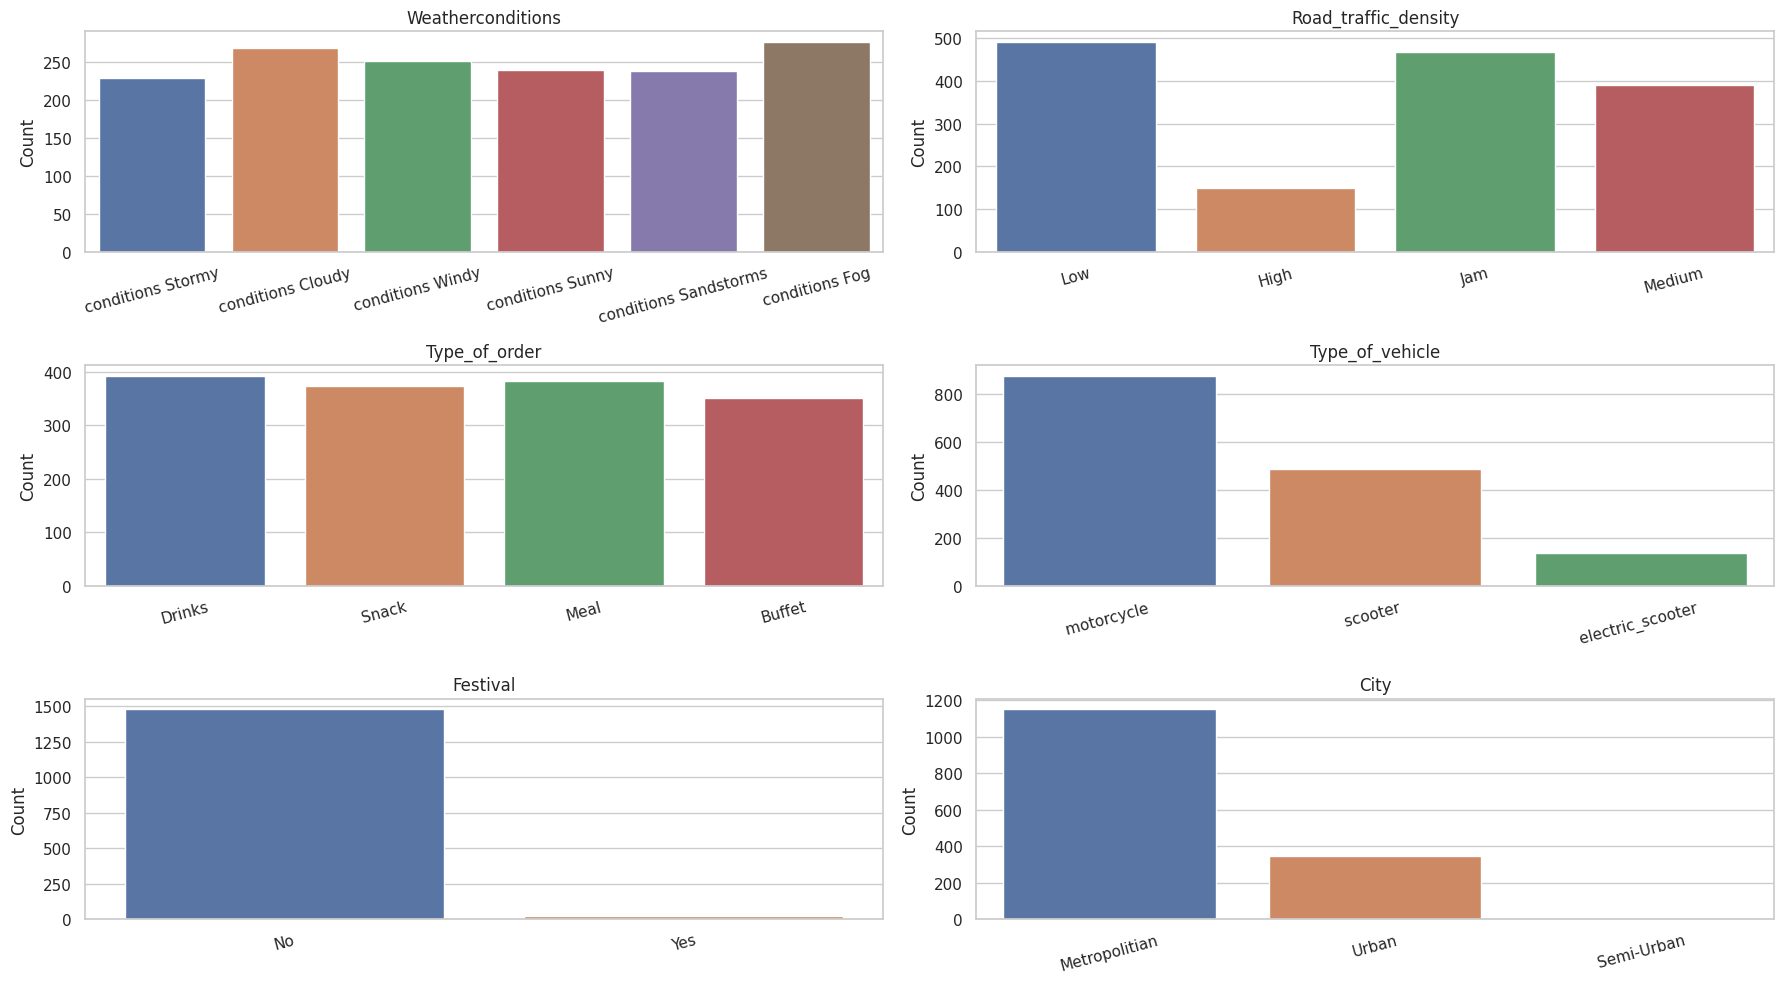

In [11]:
cat_df = data.select_dtypes(include="object").iloc[:,2:-1]
numeric_df = data.select_dtypes(exclude="object")

#### Select categorical columns
cat_df = data.select_dtypes(include="object").iloc[:, 2:-1]

### Creating subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 10))
axes = axes.flatten()

### Plotting count plots for each categorical column
for ax, column in zip(axes, cat_df.columns):
    sns.countplot(data=cat_df, x=column, ax=ax, hue=column)
    ax.set(title=column, xlabel='', ylabel='Count')
    ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

From these plots we can see:

1. Weatherconditions: Adverse weather (e.g., fog, sandstorms) leads to longer delivery times, while sunny conditions are faster.

2. Traffic: High traffic and jams significantly delay deliveries; low traffic ensures quicker deliveries.
Order Type: Buffets take the longest, while snacks and drinks are faster to deliver.

3. Vehicle Type: Motorcycles are slightly faster, though differences across vehicles are minimal.

4. Festivals: Delivery times spike during festivals due to higher demand and congestion which is again obvious.

5. City: Metropolitan areas have the shortest delivery times; followed by Urban Areas (since these area would have the better infrastructure and the restaurant density would be higher as well).

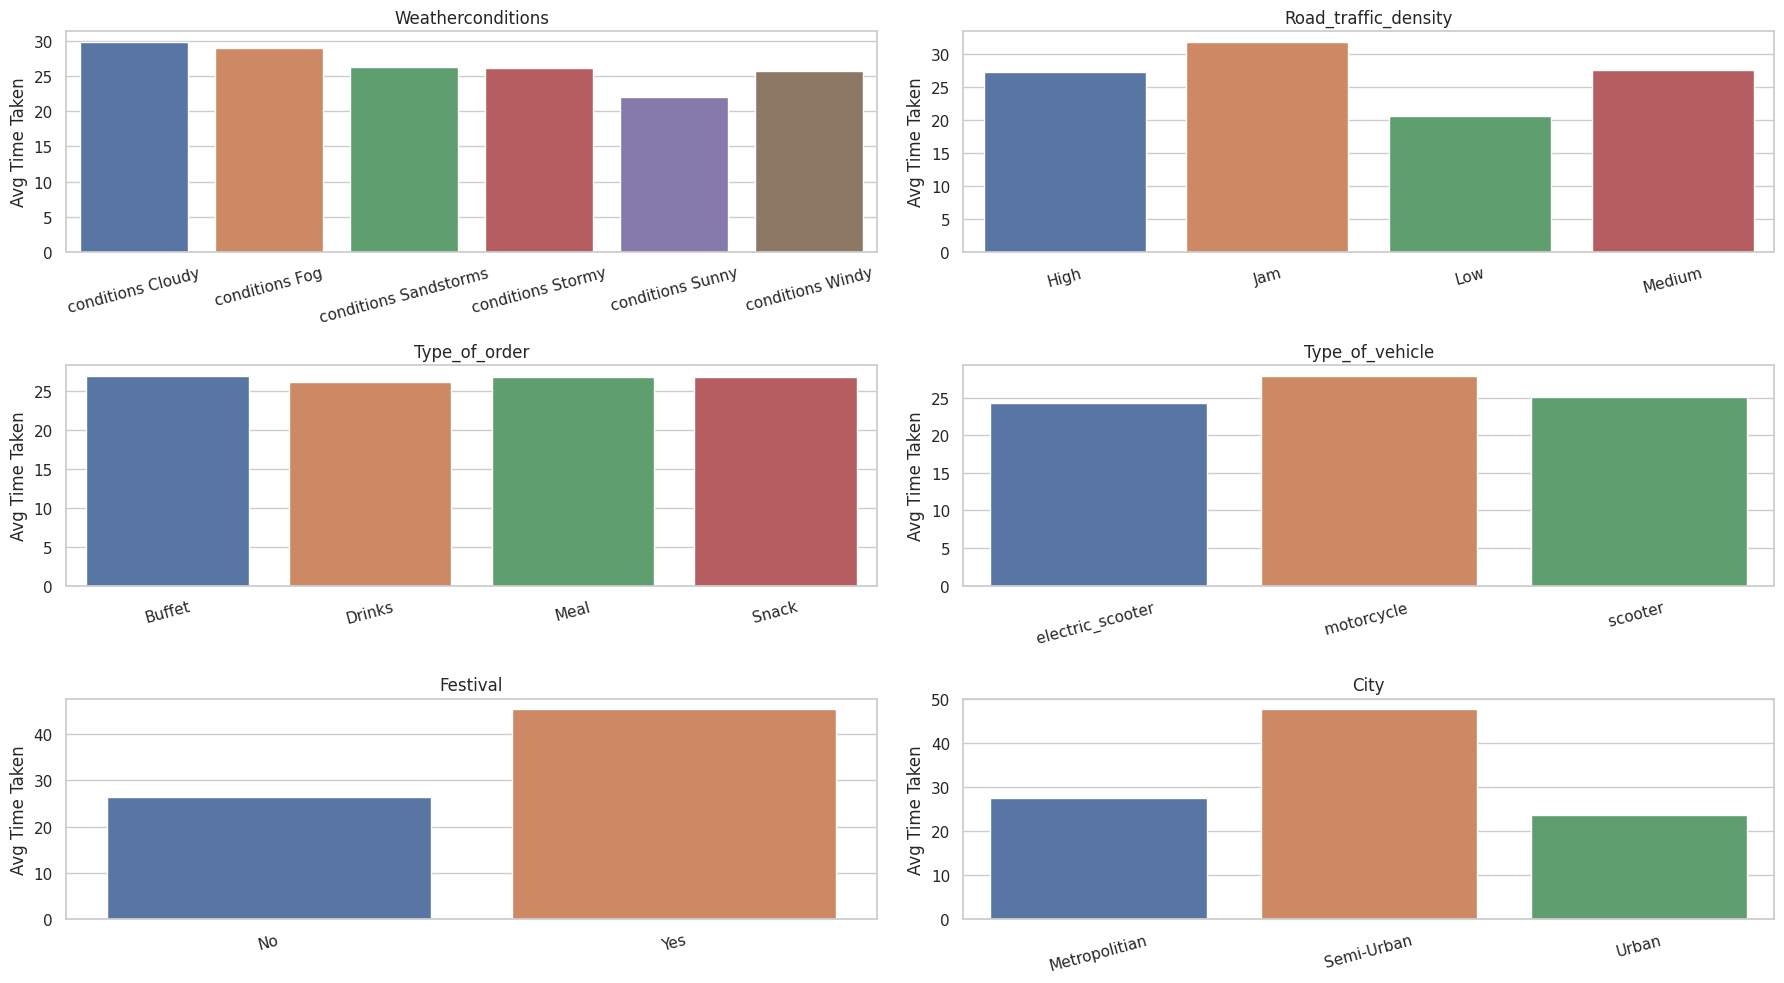

In [12]:
#### Calculate average time taken for each category and plot
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

for ax, column in zip(axes.flatten(), cat_df.columns):
    avg_time = data.groupby(column)["Time_taken(min)"].mean().reset_index()
    sns.barplot(data=avg_time, x=column, y="Time_taken(min)", ax=ax, hue=column)
    ax.set(title=column, xlabel='', ylabel='Avg Time Taken')
    ax.tick_params(axis='x', rotation=15)


plt.tight_layout()
plt.show()


We get some additional insights from the following visuals:

* Multiple Deliveries: Most orders involve a single delivery. Delivery time increases with more deliveries.

* Delivery Person Ratings: Ratings are high (4.5–5), indicating reliable performance of delivery partners.

* Delivery Person Age: Delivery partners are mostly aged 25–35.


* Vehicle Condition: Vehicles with poor conditions lead to longer delivery times.

* Total Distance: Most deliveries fall within 5–15 km range.

<ipython-input-13-a4428246715a>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot["data"], x=plot["x"], ax=plot["ax"], palette="deep")
<ipython-input-13-a4428246715a>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot["data"], x=plot["x"], ax=plot["ax"], palette="deep")
<ipython-input-13-a4428246715a>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot["data"], x=plot["x"], ax=plot["ax"], palette="deep")


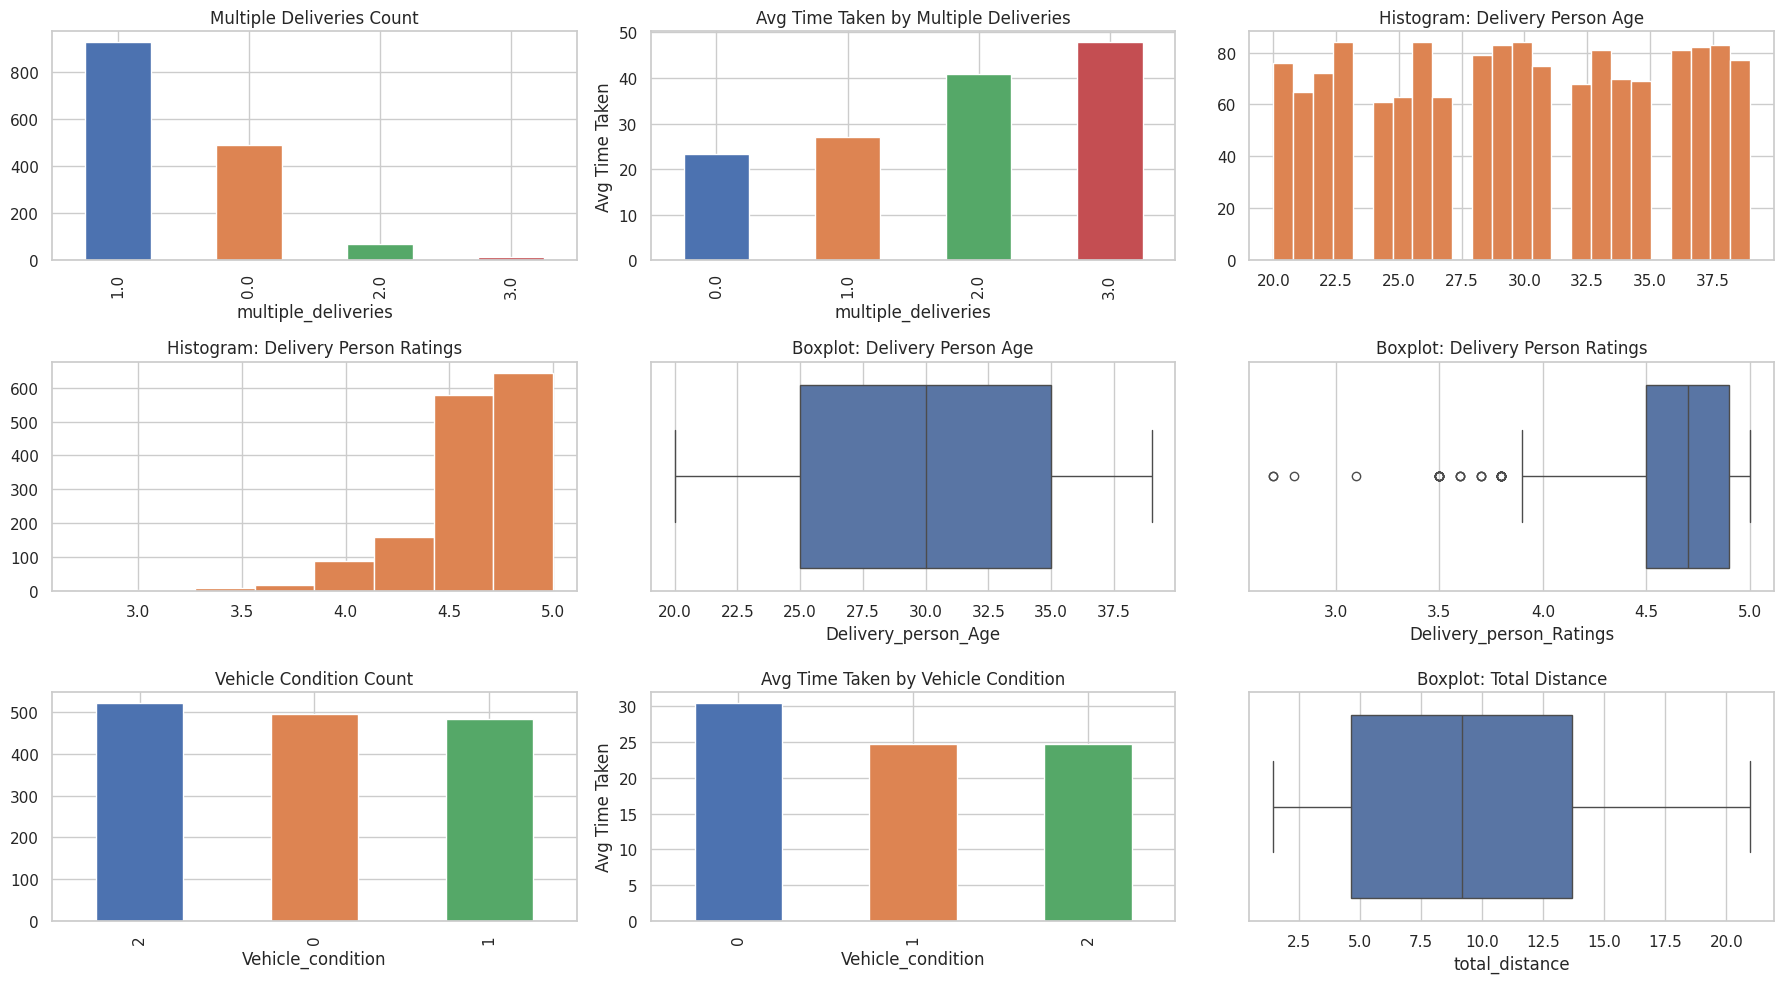

In [13]:
### Fig sizee
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.flatten()

#### Specifying all plot configs to be generated ###
plots = [
    {"type": "bar", "data": numeric_df["multiple_deliveries"].value_counts(), "title": "Multiple Deliveries Count", "ax": axes[0]},
    {"type": "bar", "data": numeric_df.groupby("multiple_deliveries")["Time_taken(min)"].mean(), "title": "Avg Time Taken by Multiple Deliveries", "ax": axes[1], "ylabel": "Avg Time Taken"},
    {"type": "hist", "data": numeric_df["Delivery_person_Age"], "title": "Histogram: Delivery Person Age", "ax": axes[2], "bins": int(math.sqrt(numeric_df["Delivery_person_Age"].max())) * 4},
    {"type": "hist", "data": numeric_df["Delivery_person_Ratings"], "title": "Histogram: Delivery Person Ratings", "ax": axes[3], "bins": int(math.sqrt(numeric_df["Delivery_person_Ratings"].max())) * 4},
    {"type": "box", "data": numeric_df, "x": "Delivery_person_Age", "title": "Boxplot: Delivery Person Age", "ax": axes[4]},
    {"type": "box", "data": numeric_df, "x": "Delivery_person_Ratings", "title": "Boxplot: Delivery Person Ratings", "ax": axes[5]},
    {"type": "bar", "data": numeric_df["Vehicle_condition"].value_counts(), "title": "Vehicle Condition Count", "ax": axes[6]},
    {"type": "bar", "data": numeric_df.groupby("Vehicle_condition")["Time_taken(min)"].mean(), "title": "Avg Time Taken by Vehicle Condition", "ax": axes[7], "ylabel": "Avg Time Taken"},
    {"type": "box", "data": numeric_df, "x": "total_distance", "title": "Boxplot: Total Distance", "ax": axes[8]},
]

for plot in plots:
    if plot["type"] == "bar":
        plot["data"].plot(kind="bar", ax=plot["ax"], color=sns.color_palette("deep"))
    elif plot["type"] == "hist":
        plot["ax"].hist(plot["data"], bins=plot["bins"], color=sns.color_palette("deep")[1], edgecolor="white")
    elif plot["type"] == "box":
        sns.boxplot(data=plot["data"], x=plot["x"], ax=plot["ax"], palette="deep")

    ### Set titles and labels ##
    plot["ax"].set_title(plot["title"])
    if "ylabel" in plot:
        plot["ax"].set_ylabel(plot["ylabel"])

plt.tight_layout()
plt.show()

### **Additional Feature Engineering and Re-categorization**


To improve the predictive capability of our dataset, additional feature engineering was done. We focused on refining categorical variables and creating new features to capture patterns in the data more effectively.

**1. Cleaning and Grouping Categorical Variables**

  * Weatherconditions: The Weatherconditions column was cleaned by removing unnecessary text such as "conditions" to standardize the values. Additionally, specific weather conditions were grouped into broader categories:

    * Adverse weather conditions such as **'Windy'** , **'Cloudy'** and **'Fog'** were grouped under a single category called **'Adverse'**. **Storm** conditions **'Sandstorms'** and **'Stormy'** were grouped together under the group storm.
Missing values in the column were assigned the label **'Unknown'** to ensure consistency and avoid dropping rows unnecessarily.

  * Road_traffic_density: The Road_traffic_density column was simplified by grouping **'Jam'** and **'High'** traffic conditions into a single category **'High'**. This grouping reduced variability in the data while still capturing the intensity of traffic that likely impacts delivery times.

**2. Time-Based Feature Transformations**

Hour of Day Transformations: To capture the cyclical nature of time, sine and cosine transformations were applied to the hour_of_day column. These transformations, hour_sin and hour_cos, encode the hour of the day in a way that reflects the periodic nature of time (e.g., 23:00 and 00:00 are close in time). As we saw from the visualizations demand changes across hours including time features in the model efficiently would improve the predictive capability.

In [14]:
data['Weatherconditions'] = data['Weatherconditions'].str.replace('conditions ', '', regex=False)
data['Weatherconditions'] = data['Weatherconditions'].replace({
    'Sandstorms': 'Storm',
    'Stormy': 'Storm',
    'Windy': 'Adverse',
    'Cloudy': 'Adverse',
    'Fog': 'Adverse',

    'NaN': 'Unknown'
})
data['Road_traffic_density'] = data['Road_traffic_density'].replace({
    'Jam': 'High',
    'High': 'High'})

data = data.reset_index(drop=True)

### Creating sine and cosine transformations for hour_of_day to capture hourly patterns
data["hour_sin"] = np.sin(2 * np.pi * data["hour_of_day"] / 24)
data["hour_cos"] = np.cos(2 * np.pi * data["hour_of_day"] / 24)

# **Model**

## **Delivery Time Prediction**

### **Model Evaluation on Full Data**

Based on the data exploration we choose a subset of the most relevant features to work with. Too many features might lead to multi-collinearity or issues of having too few values for each sub-group in the data.

We also adopted the following steps:

* Before training we scaled continuous features using StandardScaler to normalize their values, ensuring consistency across variables.

* Categorical features were encoded using integer codes for regression interpretability and one-hot encoding for model compatibility.

* The final dataset consisted of normalized float features, one hot encoded categorical variables, and transformed cyclical features.

We initially train both the models on the full data i.e. (1500 rows) and try to interpret the coefficients to see which features influence the delivery time and look at how well both the models fit.  

In [25]:
#### Specifying our float, ordinal and categorical columns
float_cols = ['Delivery_person_Age','multiple_deliveries','total_distance','Delivery_person_Ratings']
cat_cols = ['Weatherconditions', 'Road_traffic_density','Festival']
ord_cols = ['Vehicle_condition','hour_sin','hour_cos']

In [26]:
### Scaling our float columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[float_cols])

### Combine scaled floats with unmodified categorical columns
X_scaled = pd.DataFrame(X_scaled, columns=float_cols)
for col in cat_cols:
    X_scaled[col] = data[col]

for i in ord_cols:
  X_scaled[i] = data[i]
  X_scaled[i] = X_scaled[i].astype('category').cat.codes



y = data['Time_taken(min)']

### One-hot encode categorical variables
X = pd.get_dummies(X_scaled, columns=cat_cols, drop_first=True)

for i in X.columns:
  if i not in ord_cols:
    X[i] = X[i].astype(float)

ct_cols = [i for i in X.columns if i not in float_cols]

## Ensure feature names are preserved
feature_names = X.columns.tolist()

#### **Frequentist Regression**

For the frequentist approach we run an OLS. We get the following results:

**R-squared:**

R-squared value is 0.583, indicating that approximately 58.3% of the variance in delivery time is explained by the model. The model fit is moderate. If the value was around 0.8-0.9 we could have said the model fits the data quite well.

**Significant Variables (p-value < 0.05):**

* Delivery_person_Age: Older delivery partners are associated with longer delivery times.

* Multiple_deliveries: Handling multiple deliveries increases delivery time, with each additional delivery.

* Total_distance: A strong positive effect, where each additional unit of distance increases delivery time.

* Delivery_person_Ratings: Higher ratings reduce delivery time, indicating more efficient delivery partners.

* Vehicle_condition: Better-maintained vehicles reduce delivery times.

* Weatherconditions:

  * Storm: Reduces delivery time slightly compared to cloudy and fog (which are absorbed in the intercept).

  * Sunny: Associated with significantly shorter delivery times (since the coefficient is negative)

* Road_traffic_density:

  * Low traffic: Significantly reduces delivery times.
  * Medium traffic: Reduces delivery times compared to high traffic.

* Festival_Yes: Delivery times are significantly longer during festivals. In fact, out of all the features festival has the highest impact on delivery time.

**Non-significant Variables (p-value >= 0.05):**

hour_sin and hour_cos: These time-based cyclical features showed no significant effect on delivery times, suggesting that other variables like traffic and distance dominate

In [28]:
## Adding a constant to the model for the intercept
X_final = sm.add_constant(X)

## Fit the OLS regression model
ols_model = sm.OLS(y, X_final).fit()

## Display the summary of the regression model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Time_taken(min)   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     173.3
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          4.40e-272
Time:                        22:18:13   Log-Likelihood:                -4823.2
No. Observations:                1500   AIC:                             9672.
Df Residuals:                    1487   BIC:                             9741.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#### **Bayesian Regression**

In our bayesian model we try to use different priors for each of the features in our data. The priors for the Bayesian model were chosen to balance business insights and statistical flexibility, allowing the model to capture meaningful relationships while accounting for uncertainty. These priors were determined through a combination of business knowledge and trial and error. Here's a summary of the priors:

1. **Intercept (`intercept`)**:  
   A `Normal(0, 10)` prior was used to allow exploration of a wide range of baseline values due to lack of strong prior knowledge about the outcome.

2. **Continuous Variables**:  

   - **Age (`beta_age`)**: A `Normal(0, 10)` prior allows to explore different values due to lack of prior knowledge of the relationship between age and delivery time.
   - **Ratings (`beta_ratings`)**: A `Normal(-1, 0.5)` prior for ratings suggests a small reduction in delivery time (~1 minute) for a 1 SD increase in ratings.
   - **Time of Day (`beta_hour_sin`, `beta_hour_cos`)**: Priors of `Normal(0, 5)` capture cyclical patterns in performance across different times, with uncertainty in the exact effect.
   - **Distance (`beta_total_distance`)**: A `Normal(10, 5)` prior for total_distance reflects the expected increase in delivery time (~10 minutes) for a 1 SD increase (e.g., ~10 km), based on domain knowledge and standardized scale.

3. **Weather Conditions**:  
   - **Storm (`beta_storm`)**: A `Normal(2, 1)` prior reflects the expectation that stormy conditions increase delivery times or costs, with some uncertainty.
   - **Sunny (`beta_sunny`)**: A `Normal(-0.5, 0.5)` prior assumes sunny weather improves performance, with uncertainty in the effect.

4. **Traffic Density**:  
   - **Low Traffic (`beta_traffic_low`)**: The `Normal(-2, 1)` prior assumes lower traffic improves delivery performance, with moderate uncertainty.
   - **Medium Traffic (`beta_traffic_medium`)**: A `Normal(0.5, 0.5)` prior reflects a smaller positive effect from medium traffic.

5. **Categorical Variables**:  
   - **Multiple Deliveries (`beta_multiple_deliveries`)**: A  `Normal(5, 2)` prior for multiple_deliveries reflects the expected increase in delivery time (~5 minutes) for a 1 SD increase.
   - **Vehicle Condition (`beta_vehicle_condition`)**: A `Normal(-1, 0.5)` prior assumes a small reduction (~1 minute per SD increase) with moderate certainty.
   - **Festival (`beta_festival`)**: The `Normal(2, 1)` prior reflects the assumption that festivals increase performance due to higher demand.

6. **Noise (`sigma`)**:  
   A `HalfNormal(10)` prior was selected to ensure positive residual variation in the outcome, restricting excessively large noise values to help avoid overfitting.

7. **Likelihood**:  
   The likelihood was modeled using a `TruncatedNormal` distribution, with mean (`mu`) based on the linear predictor and standard deviation (`sigma`) derived from the `HalfNormal(10)` prior. The `TruncatedNormal` ensures that the observed values are constrained to be non-negative.

In [44]:
# Define the Bayesian model
with pm.Model() as bayesian_model:
    # Intercept
    intercept = pm.Normal("intercept", mu=0, sigma=10)

    ### Continuous variables
    beta_age = pm.Normal("beta_age", mu=0, sigma=10)
    beta_ratings = pm.Normal("beta_ratings", mu=-1, sigma=0.5)
    beta_hour_sin = pm.Normal("beta_hour_sin", mu=0, sigma=5)
    beta_hour_cos = pm.Normal("beta_hour_cos", mu=0, sigma=5)
    beta_total_distance = pm.Normal("beta_total_distance", mu=10, sigma=5)  # Effect of 1 std (~10 km)
    beta_multiple_deliveries = pm.Normal("beta_multiple_deliveries", mu=5, sigma=2)  # Effect of 1 std (~1.2 deliveries)

    ### Weather conditions
    beta_storm = pm.Normal("beta_storm", mu=2, sigma=1)
    beta_sunny = pm.Normal("beta_sunny", mu=-0.5, sigma=0.5)

    ### Road traffic density
    beta_traffic_low = pm.Normal("beta_traffic_low", mu=-2, sigma=1)
    beta_traffic_medium = pm.Normal("beta_traffic_medium", mu=0.5, sigma=0.5)

    ## Vehicle condition - specified as ordinal variable
    beta_vehicle_condition = pm.Normal("beta_vehicle_condition", mu=-1, sigma=0.5)

    ### Festival
    beta_festival = pm.Normal("beta_festival", mu=2, sigma=1)

    ### Linear predictor
    mu = (
        intercept +
        beta_age * X["Delivery_person_Age"] +
        beta_ratings * X["Delivery_person_Ratings"] +
        beta_hour_sin * X["hour_sin"] +
        beta_hour_cos * X["hour_cos"] +
        beta_total_distance * X["total_distance"] +
        beta_storm * X["Weatherconditions_Storm"] +
        beta_sunny * X["Weatherconditions_Sunny"] +
        beta_traffic_low * X["Road_traffic_density_Low"] +
        beta_traffic_medium * X["Road_traffic_density_Medium"] +
        beta_multiple_deliveries * X["multiple_deliveries"] +
        beta_vehicle_condition * X["Vehicle_condition"] +
        beta_festival * X["Festival_Yes"]
    )

    #### Likelihood
    sigma = pm.HalfNormal("sigma", sigma=10)
    likelihood = pm.TruncatedNormal("likelihood", mu=mu, sigma=sigma, observed=y, lower=0)

    ### We sample here
    trace = pm.sample(1000, tune=500, return_inferencedata=True, progressbar=True, nuts_sampler="numpyro")


/usr/local/lib/python3.10/dist-packages/pytensor/tensor/rewriting/elemwise.py:1024: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

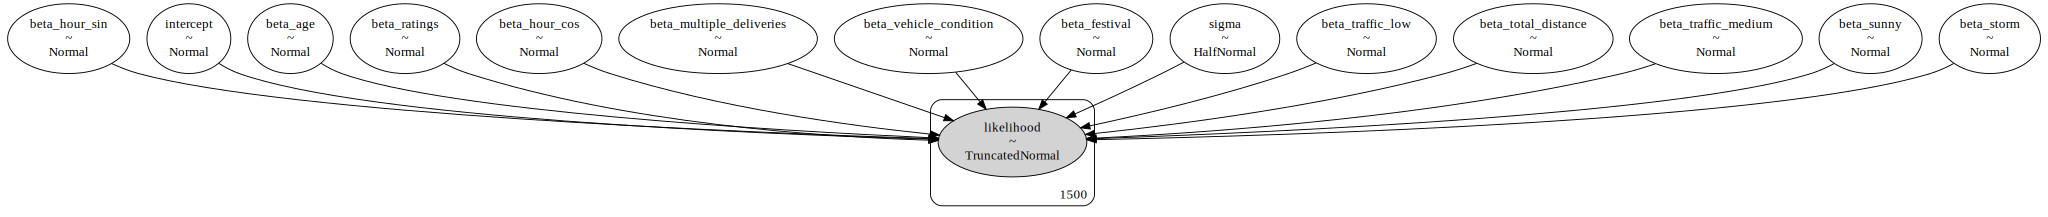

In [45]:
### Plot showing model structure
pm.model_to_graphviz(model=bayesian_model)

The Bayesian regression results align closely with the frequentist findings, providing a consistent understanding of the key factors influencing delivery times. Both models identify **festivals**, **multiple deliveries**, **total distance**, **age**, **traffic density** etc as significant predictors, while time-of-day show no significant effect.

In the **Frequentist Approach** significance is determined by p-values (< 0.05), indicating a low probability that the observed effect is due to random chance. In the **Bayesian Approach** significance is evaluated using the 95% credible intervals. If the interval does not include zero, the effect is considered significant.

#### **Significant Predictors**

Both models highlight several variables with a strong and consistent impact:

1. **Festivals**: Delivery times increase significantly during festivals, as indicated by credible intervals which do not include zero.

2. **Multiple Deliveries**: Both models confirm that handling more deliveries substantially increases delivery times.

3. **Total Distance**: Distance consistently shows a strong positive relationship with delivery times.

4. **Traffic Density**:
   - **Low and Medium Traffic**: Both models find that reduced traffic density leads to significantly shorter delivery times.

5. **Vehicle Condition**: Better-maintained vehicles are strongly associated with shorter delivery times.

6. **Delivery Person Ratings**: Higher ratings consistently reduce delivery times.

7. **Weatherconditions (Storm)**: Both models agree that stormy weather does have a significant impact but it's minimal (which is a bit counter intuitive), suggesting that other operational variables may mitigate its effects.

#### **Non-Significant Predictors**
* **Time-of-Day Variables (hour_sin, hour_cos)**: Neither model finds a significant effect of time-of-day on delivery times, likely because other factors (e.g., traffic, distance) dominate.

#### **Additional Insights**

1.  All predictors have an R-hat of 1.0, confirming that the model has successfully converged, ensuring trustworthy estimates.

2. The Bayesian model provides richer insights through credible intervals, showing tighter intervals for key predictors like **total distance** and **multiple deliveries**, indicating greater confidence.

3. The posterior predictive check in the Bayesian approach validates the model’s ability to replicate observed data, offering a stronger visual confirmation.

4. While the frequentist model directly provides significance through p-values, the Bayesian approach allows for a more nuanced understanding of the uncertainty around each coefficient.


In [46]:
## Summarize the posterior distributions
bayesian_summary = az.summary(trace, hdi_prob=0.95)

## Display the summary
bayesian_summary

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_age,2.246,0.170,1.923,2.584,0.003,0.002,3621.0,1298.0,1.0
beta_festival,5.562,0.828,3.936,7.159,0.018,0.013,2134.0,1476.0,1.0
beta_hour_cos,0.080,0.067,-0.046,0.210,0.002,0.002,873.0,1441.0,1.0
beta_hour_sin,0.094,0.071,-0.038,0.230,0.003,0.002,788.0,1198.0,1.0
beta_multiple_deliveries,1.872,0.174,1.527,2.202,0.004,0.003,2301.0,1482.0,1.0
beta_ratings,-2.027,0.161,-2.316,-1.679,0.004,0.003,1894.0,1397.0,1.0
beta_storm,-0.900,0.328,-1.523,-0.240,0.008,0.006,1836.0,1420.0,1.0
beta_sunny,-3.243,0.324,-3.857,-2.626,0.008,0.006,1632.0,1556.0,1.0
beta_total_distance,1.763,0.219,1.300,2.141,0.005,0.003,2028.0,1613.0,1.0
beta_traffic_low,-7.440,0.575,-8.622,-6.401,0.019,0.013,942.0,1451.0,1.0


The posterior predictive check (ppc) plot shows alignment between the observed and predicted distributions showing that the Bayesian model captures the key patterns in delivery times to quite an extent.

Output()

<Axes: xlabel='likelihood'>

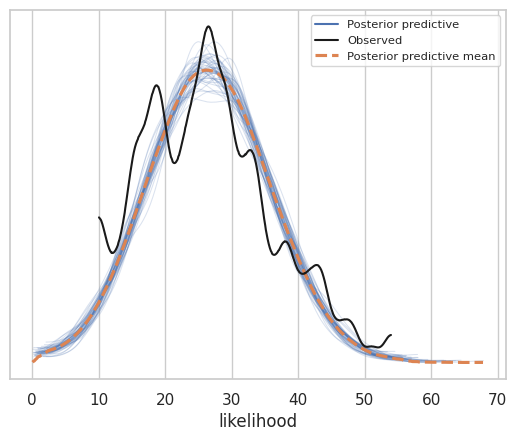

In [47]:
with bayesian_model:
    pm.sample_posterior_predictive(trace, extend_inferencedata=True)
az.plot_ppc(trace, num_pp_samples=50)

### **Performance on Train & Test sets**

Next we divide our dataset into train and test sets. For testing we are keeping 20% of the data (300 records). We train both our models on the train set and then evaluate their performance on test set using metrics mean squared error, mean absolute error, r-squared and mean absolute percentage error.

In [48]:
### Splitting the data into train and test sets (using 20% for testing) to evaluate prediction performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Adding constant for OLS model
X_train_freq = sm.add_constant(X_train)
y_train = y_train.astype(float)

X_test_freq = sm.add_constant(X_test)
y_test = y_test.astype(float)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1200, 12), (1200,), (300, 12), (300,))

In [49]:
### Fitting the OLS regression model
ols_model = sm.OLS(y_train, X_train_freq).fit()

### Predictions for frequentist model on test set
ols_predictions = ols_model.predict(X_test_freq)

In [50]:
with pm.Model() as bayesian_model_predict:

    ### Defining shared data
    X_data = pm.Data("X_data", X_train.values)
    y_data = pm.Data("y_data", y_train.values)

    # Intercept
    intercept = pm.Normal("intercept", mu=0, sigma=10)

    ### Continuous variables
    beta_age = pm.Normal("beta_age", mu=0, sigma=10)
    beta_ratings = pm.Normal("beta_ratings", mu=-1, sigma=0.5)
    beta_hour_sin = pm.Normal("beta_hour_sin", mu=0, sigma=5)
    beta_hour_cos = pm.Normal("beta_hour_cos", mu=0, sigma=5)
    beta_total_distance = pm.Normal("beta_total_distance", mu=10, sigma=5)  # Effect of 1 std (~10 km)
    beta_multiple_deliveries = pm.Normal("beta_multiple_deliveries", mu=5, sigma=2)  # Effect of 1 std (~1.2 deliveries)

    ### Weather conditions
    beta_storm = pm.Normal("beta_storm", mu=2, sigma=1)
    beta_sunny = pm.Normal("beta_sunny", mu=-0.5, sigma=0.5)

    ### Road traffic density
    beta_traffic_low = pm.Normal("beta_traffic_low", mu=-2, sigma=1)
    beta_traffic_medium = pm.Normal("beta_traffic_medium", mu=0.5, sigma=0.5)

    ## Vehicle condition
    beta_vehicle_condition = pm.Normal("beta_vehicle_condition", mu=-1, sigma=0.5)

    ### Festival
    beta_festival = pm.Normal("beta_festival", mu=2, sigma=1)

    ### Linear predictor
    mu = (
    intercept +
    beta_age * X_data[:, X_train.columns.get_loc("Delivery_person_Age")] +
    beta_ratings * X_data[:, X_train.columns.get_loc("Delivery_person_Ratings")] +
    beta_hour_sin * X_data[:, X_train.columns.get_loc("hour_sin")] +
    beta_hour_cos * X_data[:, X_train.columns.get_loc("hour_cos")] +
    beta_total_distance * X_data[:, X_train.columns.get_loc("total_distance")] +
    beta_storm * X_data[:, X_train.columns.get_loc("Weatherconditions_Storm")] +
    beta_sunny * X_data[:, X_train.columns.get_loc("Weatherconditions_Sunny")] +
    beta_traffic_low * X_data[:, X_train.columns.get_loc("Road_traffic_density_Low")] +
    beta_traffic_medium * X_data[:, X_train.columns.get_loc("Road_traffic_density_Medium")] +
    beta_multiple_deliveries * X_data[:, X_train.columns.get_loc("multiple_deliveries")] +
    beta_vehicle_condition * X_data[:, X_train.columns.get_loc("Vehicle_condition")] +
    beta_festival * X_data[:, X_train.columns.get_loc("Festival_Yes")]
    )

    # Likelihood
    sigma = pm.HalfNormal("sigma", sigma=10)
    likelihood = pm.TruncatedNormal("likelihood", mu=mu, sigma=sigma, observed=y_data,lower=0)

    # Sampling
    trace_sub = pm.sample(1000, tune=500, return_inferencedata=True, progressbar=True, nuts_sampler="numpyro")
    pm.sample_posterior_predictive(trace_sub, extend_inferencedata=True)

/usr/local/lib/python3.10/dist-packages/pytensor/tensor/rewriting/elemwise.py:1024: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

Output()

### **Train & Test Prediction Results**

The performance evaluation was conducted on the training set to compare the frequentist and Bayesian regression models. The frequentist model demonstrates better accuracy on the training data, as shown by its Mean Squared Error (MSE) of 37.1752, Mean Absolute Error (MAE) of 4.8114, and Mean Absolute Percentage Error (MAPE) of 20.44%. Its R-squared value of 0.5849 indicates that the model explains 58.49% of the variance in delivery times. These metrics suggest that the frequentist model fits the training data more closely, producing relatively precise predictions.

In contrast, the Bayesian model has a slightly higher MSE of 39.55, MAE of 4.95, and MAPE of 21.15%. Its R-squared value of 0.5582 shows that it explains 55.82% of the variance in delivery times. While the Bayesian model's accuracy is lower on the training set compared to the frequentist model, it offers unique advantages. The Bayesian approach provides posterior distributions and credible intervals for each parameter, allowing for a detailed understanding of uncertainty in predictions. This added insight can be valuable for addressing operational variability and planning under uncertain conditions.

In [51]:
#### Train set model performance

#### Frequentist model metrics
ols_predictions_train = ols_model.predict(X_train_freq)
ols_mse_train = mean_squared_error(y_train, ols_predictions_train)
ols_mae_train = mean_absolute_error(y_train, ols_predictions_train)
ols_mape_train = mean_absolute_percentage_error(y_train, ols_predictions_train)
ols_r2_train = r2_score(y_train, ols_predictions_train)


y_pred_mean = trace_sub.posterior_predictive["likelihood"].mean(dim=["chain", "draw"]).values

### Bayesian model metrics
train_mse = mean_squared_error(y_train, y_pred_mean)
train_mae = mean_absolute_error(y_train, y_pred_mean)
train_mape = mean_absolute_percentage_error(y_train, y_pred_mean)
train_r2 = r2_score(y_train, y_pred_mean)


### Printing results
print('Training Set Performance: ')

print("\nFrequentist Model Performance:")
print(f"Mean Squared Error: {ols_mse_train:.4f}")
print(f"Mean Absolute Error: {ols_mae_train:.4f}")
print(f"Mean Absolute Percentage Error: {ols_mape_train:.4f}")
print(f"R-squared: {ols_r2_train:.4f}")

print("\nBayesian Model Performance:")
print(f"Mean Squared Error: {train_mse:.4f}")
print(f"Mean Absolute Error: {train_mae:.4f}")
print(f"Mean Absolute Percentage Error: {train_mape:.4f}")
print(f"R-squared: {train_r2:.4f}")

Training Set Performance: 

Frequentist Model Performance:
Mean Squared Error: 37.1752
Mean Absolute Error: 4.8114
Mean Absolute Percentage Error: 0.2044
R-squared: 0.5849

Bayesian Model Performance:
Mean Squared Error: 39.5581
Mean Absolute Error: 4.9576
Mean Absolute Percentage Error: 0.2115
R-squared: 0.5582



The test set performance evaluation shows that the frequentist model performs better than the Bayesian model in predicting delivery times. The frequentist model has a Mean Squared Error (MSE) of 33.38, Mean Absolute Error (MAE) of 4.70, and a Mean Absolute Percentage Error (MAPE) of 20.37%, with an R-squared value of 0.57, meaning it explains about 57% of the variability in delivery times. The Bayesian model, on the other hand, has a higher MSE of 35.07, MAE of 4.76, and MAPE of 20.91%, with an R-squared value of 0.547, explaining 55% of the variability. These results show that the frequentist model makes more accurate predictions on the test data. However, the Bayesian model provides extra insights by showing the uncertainty in its predictions, which the frequentist model does not. While the frequentist model is slightly better for accuracy in this case, the Bayesian model is useful for scenarios where understanding uncertainty is important, making both models valuable depending on the situation.

In [52]:
X_test_final = X_test.values

with bayesian_model_predict:
    pm.set_data({"X_data": X_test_final, "y_data": y_test})

    ### Sample predictions for the test set
    bayesian_test_predictions = pm.sample_posterior_predictive(trace_sub, var_names=["likelihood"], progressbar=True,predictions=True, return_inferencedata=True)


bayesian_predictions = bayesian_test_predictions.predictions["likelihood"].mean(dim=["chain", "draw"]).values

Output()

In [53]:
#### Test Set Performance Comparison

#### Frequentist model metrics
ols_mse = mean_squared_error(y_test, ols_predictions)
ols_mae = mean_absolute_error(y_test, ols_predictions)
ols_mape = mean_absolute_percentage_error(y_test, ols_predictions)
ols_r2 = r2_score(y_test, ols_predictions)

#### Bayesian model metrics
bayesian_mse = mean_squared_error(y_test, bayesian_predictions)
bayesian_mae = mean_absolute_error(y_test, bayesian_predictions)
bayesian_mape = mean_absolute_percentage_error(y_test, bayesian_predictions)
bayesian_r2 = r2_score(y_test, bayesian_predictions)


### Printing results
print('Test Set Performance: ')

print("\nFrequentist Model Performance:")
print(f"Mean Squared Error: {ols_mse:.4f}")
print(f"Mean Absolute Error: {ols_mae:.4f}")
print(f"Mean Absolute Percentage Error: {ols_mape:.4f}")
print(f"R-squared: {ols_r2:.4f}")

print("\nBayesian Model Performance:")
print(f"Mean Squared Error: {bayesian_mse:.4f}")
print(f"Mean Absolute Error: {bayesian_mae:.4f}")
print(f"Mean Absolute Percentage Error: {bayesian_mape:.4f}")
print(f"R-squared: {bayesian_r2:.4f}")

Test Set Performance: 

Frequentist Model Performance:
Mean Squared Error: 33.3801
Mean Absolute Error: 4.6959
Mean Absolute Percentage Error: 0.2037
R-squared: 0.5696

Bayesian Model Performance:
Mean Squared Error: 35.0770
Mean Absolute Error: 4.7666
Mean Absolute Percentage Error: 0.2091
R-squared: 0.5477


# **Conclusion**

This project focused on predicting delivery times using Frequentist and Bayesian regression models, providing useful insights into the factors affecting delivery time.

Both models identified similar important factors, such as festivals, multiple deliveries, total distance, and traffic density, while the hour_sin and hour_cosine features showed little to no impact. The frequentist model performed better on both the training and test datasets, making it a good choice for tasks that require accuracy and efficiency. On the other hand, the Bayesian model offered additional benefits, such as the ability to measure uncertainty and provide more reliable parameter estimates, supported by posterior predictive checks and credible intervals.

One potential avenue for improvement in the Bayesian model could be incorporating more informative priors based on domain expertise or historical data. Better priors could help guide the model toward more accurate estimates, particularly in situations with limited data or high variability. From an operational perspective, the results highlight areas for improvement, such as optimizing routes for multiple deliveries, maintaining vehicles, and allocating resources more effectively during festivals. The Bayesian model’s ability to handle uncertainty makes it particularly useful for real-world decision-making in unpredictable scenarios.

Overall, this project compared the two modeling approaches and showed their practical use in improving delivery operations. The frequentist model excels at providing accurate and efficient predictions, while the Bayesian model offers a better understanding of uncertainty and reliability, making both models valuable for enhancing delivery performance.

# **Reference**

The dataset has been taken from here:

* https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset/data

The inspiration of the code for the above three questions has been taken from the following sources:

1. Aaron's office hours from 7th November:
https://gatech.instructure.com/courses/407754/external_tools/17731

2. Aaron's office hours pdf and ipynb from 14th November:

  * https://static.us.edusercontent.com/files/DtMJN4Bb6Xw6SBX9kE6axHwE

  * https://static.us.edusercontent.com/files/LhOno4oYQCvXe5Y3f6I9Xq42

3. Multilevel Models:
https://areding.github.io/6420-pymc/unit7/Unit7-multilevel.html

4. Paraguay Vaccination Status - GitHub Repo: https://areding.github.io/6420-pymc/unit7/Unit7-demo-multilevel.html

5. Generalized Linear Models - GitHub Repo: https://areding.github.io/6420-pymc/unit7/Unit7-arrhythmia.html

6. Rats Example with Missing Data - GitHub Repo: https://areding.github.io/6420-pymc/unit8/Unit8-missrats.html

7. Gastric Cancer - GitHub Repo: https://areding.github.io/6420-pymc/unit8/Unit8-tte-gastric.html

8. Out of Sample Predicitons: https://www.pymc-labs.com/blog-posts/out-of-model-predictions-with-pymc/

9. Categorical regression: https://www.pymc.io/projects/examples/en/latest/bart/bart_categorical_hawks.html

10. Haversine distance (to compute total distance between latitude and longitude points): https://community.esri.com/t5/coordinate-reference-systems-blog/distance-on-a-sphere-the-haversine-formula/ba-p/902128#:~:text=For%20example%2C%20haversine(%CE%B8),longitude%20of%20the%20two%20points.

11. Sine Cosine seasonality features: https://towardsdatascience.com/modeling-variable-seasonal-features-with-the-fourier-transform-18c792102047
